In [1]:
import numpy as np
import pandas as pd
from utils import *

In [2]:
harp_flare_data = pd.read_parquet("../combined_data/processed_high-qual_near-center-70_no-nas_flares.parquet")
print(harp_flare_data.shape)
harp_flare_data.head()

(3974765, 54)


,HARPNUM,T_REC,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,...,T_FRST1,T_LAST1,NOAA_AR,NOAA_NUM,NOAA_ARS,start time,peak time,end time,flare_class,peak_intensity
0,1,2010-05-01 14:00:00+00:00,5.827622e+21,23.887,73.347,77.564,31.354,-0.151826,4.860817e+12,0.000398,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
1,1,2010-05-01 14:12:00+00:00,5.768150e+21,24.708,71.970,76.249,31.197,-0.226835,4.908301e+12,0.000081,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
2,1,2010-05-01 14:24:00+00:00,5.865157e+21,25.657,74.254,82.154,32.748,-0.260023,5.577384e+12,-0.009573,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
3,1,2010-05-01 14:36:00+00:00,5.854875e+21,25.242,74.539,81.896,33.026,-0.199640,5.290721e+12,-0.013852,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
4,1,2010-05-01 14:48:00+00:00,5.854465e+21,25.876,75.671,85.297,33.556,-0.403703,5.911234e+12,-0.012455,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN


In [3]:
harp_flare_data["TOTUSJH"] = np.log(harp_flare_data["TOTUSJH"] + 1)
harp_flare_data["TOTUSJZ"] = np.log(harp_flare_data["TOTUSJZ"] + 1)
harp_flare_data["USFLUX"] = np.log(harp_flare_data["USFLUX"] + 1)
harp_flare_data["TOTPOT"] = np.log(harp_flare_data["TOTPOT"] + 1)
harp_flare_data["ABSNJZH"] = np.log(harp_flare_data["ABSNJZH"] + 1)
harp_flare_data["SAVNCPP"] = np.log(harp_flare_data["SAVNCPP"] + 1)
harp_flare_data["NACR"] = np.log(harp_flare_data["NACR"] + 1)
harp_flare_data["SIZE_ACR"] = np.log(harp_flare_data["SIZE_ACR"] + 1)
harp_flare_data["SIZE"] = np.log(harp_flare_data["SIZE"] + 1)
harp_flare_data["NPIX"] = np.log(harp_flare_data["NPIX"] + 1)

In [4]:
def calc_flare_stats(flare_data: pd.DataFrame) -> pd.Series:
    first_time = flare_data["T_REC"].iloc[0]
    last_time = flare_data["T_REC"].iloc[-1]
    harp_duration_in_hrs = (last_time - first_time).total_seconds() / 3600

    flare_data = flare_data.drop(columns="T_REC").drop_duplicates()
    flare_data = flare_data[flare_data["start time"].notna()]

    num_c_plus_flares = flare_data["flare_class"].isin(["C", "M", "X"]).sum()
    c_plus_flares_per_hr = num_c_plus_flares / harp_duration_in_hrs
    num_m_plus_flares = flare_data["flare_class"].isin(["M", "X"]).sum()
    m_plus_flares_per_hr = num_m_plus_flares / harp_duration_in_hrs
    num_x_flares = (flare_data["flare_class"] == "X").sum()
    x_flares_per_hr = num_x_flares / harp_duration_in_hrs
    flare_stats = pd.Series({
        "harp_duration_in_hrs": harp_duration_in_hrs,
        "num_c_plus_flares": num_c_plus_flares,
        "c_plus_flares_per_hr": c_plus_flares_per_hr,
        "num_m_plus_flares": num_m_plus_flares,
        "m_plus_flares_per_hr": m_plus_flares_per_hr,
        "num_x_flares": num_x_flares,
        "x_flares_per_hr": x_flares_per_hr
    })

    return flare_stats

In [5]:
harp_flare_stats = harp_flare_data.groupby("HARPNUM")[["T_REC", "start time", "flare_class"]].apply(calc_flare_stats)
harp_flare_stats.head()

/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:12: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:14: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:12: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:14: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_60102/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_601

,harp_duration_in_hrs,num_c_plus_flares,c_plus_flares_per_hr,num_m_plus_flares,m_plus_flares_per_hr,num_x_flares,x_flares_per_hr
HARPNUM,,,,,,,
1,242.2,0.0,0.000000,0.0,0.000000,0.0,0.0
2,107.8,0.0,0.000000,0.0,0.000000,0.0,0.0
5,53.0,0.0,0.000000,0.0,0.000000,0.0,0.0
6,104.4,0.0,0.000000,0.0,0.000000,0.0,0.0
8,143.6,7.0,0.048747,2.0,0.013928,0.0,0.0


In [6]:
harp_flare_stats[harp_flare_stats.isna().any(axis=1)]

,harp_duration_in_hrs,num_c_plus_flares,c_plus_flares_per_hr,num_m_plus_flares,m_plus_flares_per_hr,num_x_flares,x_flares_per_hr
HARPNUM,,,,,,,
1486,0.0,0.0,NaN,0.0,NaN,0.0,NaN
3538,0.0,0.0,NaN,0.0,NaN,0.0,NaN
5968,0.0,0.0,NaN,0.0,NaN,0.0,NaN


In [7]:
harp_flare_data[harp_flare_data["HARPNUM"].isin([1486, 3538, 5968])]

,HARPNUM,T_REC,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,...,T_FRST1,T_LAST1,NOAA_AR,NOAA_NUM,NOAA_ARS,start time,peak time,end time,flare_class,peak_intensity
550011,1486,2012-03-19 17:48:00+00:00,40.911529,24.164,58.895,44.051,54.024,10.744670,21.078798,-0.306171,...,2012-03-19 10:24:00+00:00,2012-03-19 17:48:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN
1291214,3538,2013-12-24 14:48:00+00:00,47.943267,25.615,105.648,114.526,43.000,0.431428,27.744232,-0.013963,...,2013-12-24 00:36:00+00:00,2013-12-26 00:12:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN
2114594,5968,2015-09-17 02:36:00+00:00,47.440496,27.494,82.910,90.048,35.254,1.217139,26.864159,-0.032743,...,2015-09-17 02:36:00+00:00,2015-09-18 06:00:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN


In [8]:
harp_flare_stats[["num_c_plus_flares", "num_m_plus_flares", "num_x_flares"]].apply(lambda x: x > 0).sum()

num_c_plus_flares    2861
num_m_plus_flares     587
num_x_flares           44
dtype: int64

In [9]:
harp_flare_data = harp_flare_data[["HARPNUM", "T_REC"] + all_predictors + ["peak time", "flare_class"]]

In [10]:
pd.DataFrame({"min": harp_flare_data[all_predictors].min(), "max": harp_flare_data[all_predictors].max()})

,min,max
MEANGBH,1.447000,168.633000
MEANGBZ,4.641000,336.849000
MEANGAM,8.057000,88.341000
MEANGBT,6.383000,334.514000
MEANJZD,-19.067125,25.255054
MEANALP,-2.175931,1.978445
SHRGT45,0.000000,100.000000
MEANSHR,0.781000,89.716000
MEANJZH,-0.145076,0.153423
MEANPOT,0.739894,28468.150000


In [11]:
minmax_scaled_harp_flare_data = harp_flare_data.copy()
minmax_scaled_harp_flare_data[all_predictors] = minmax_scale(harp_flare_data[all_predictors])

In [15]:
rank_transformed_harp_flare_data = harp_flare_data.copy()
rank_transformed_harp_flare_data[all_predictors] = rank_transformed_harp_flare_data[all_predictors].apply(rank_transform)

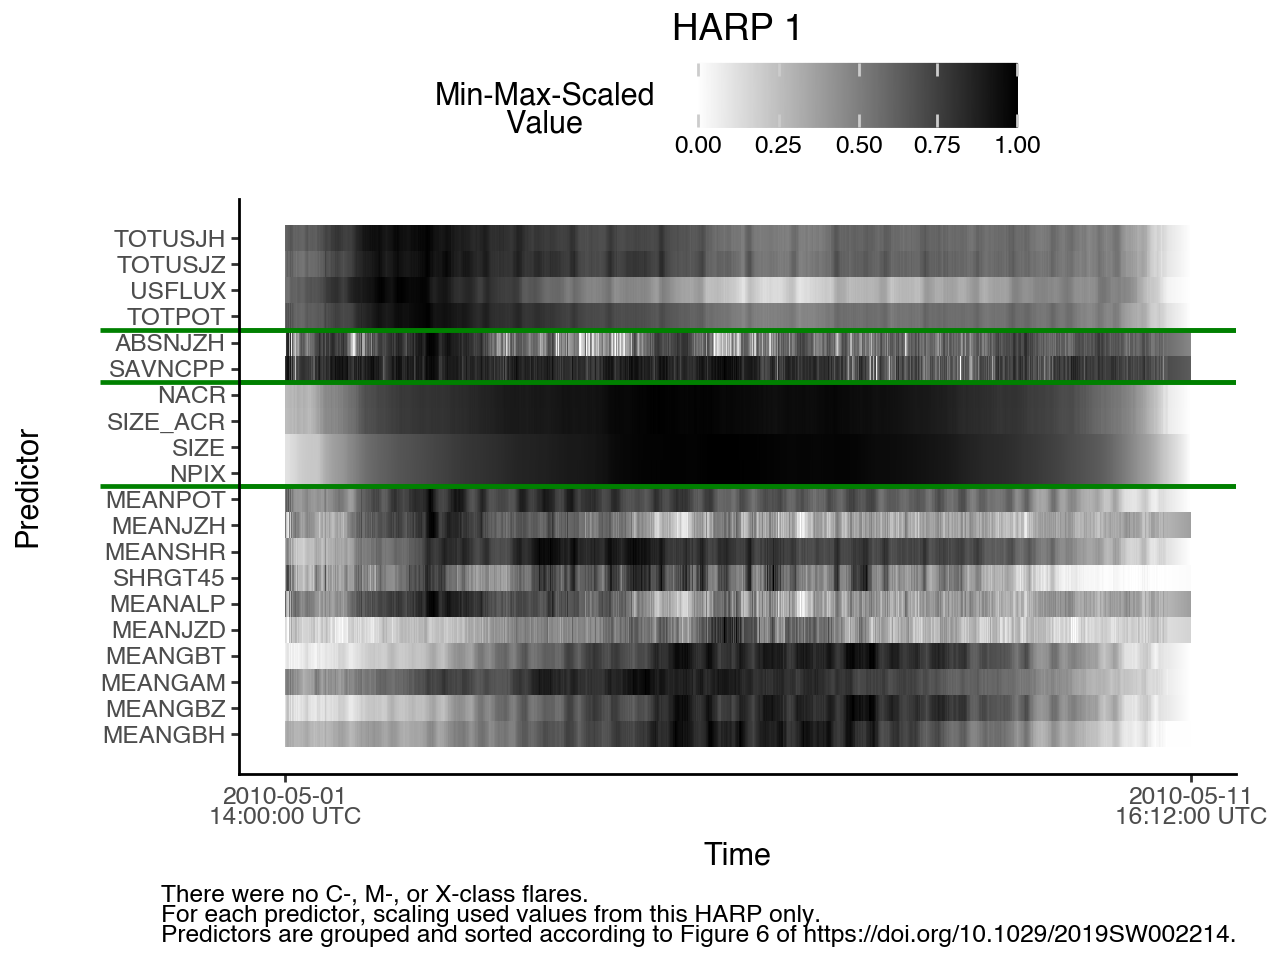

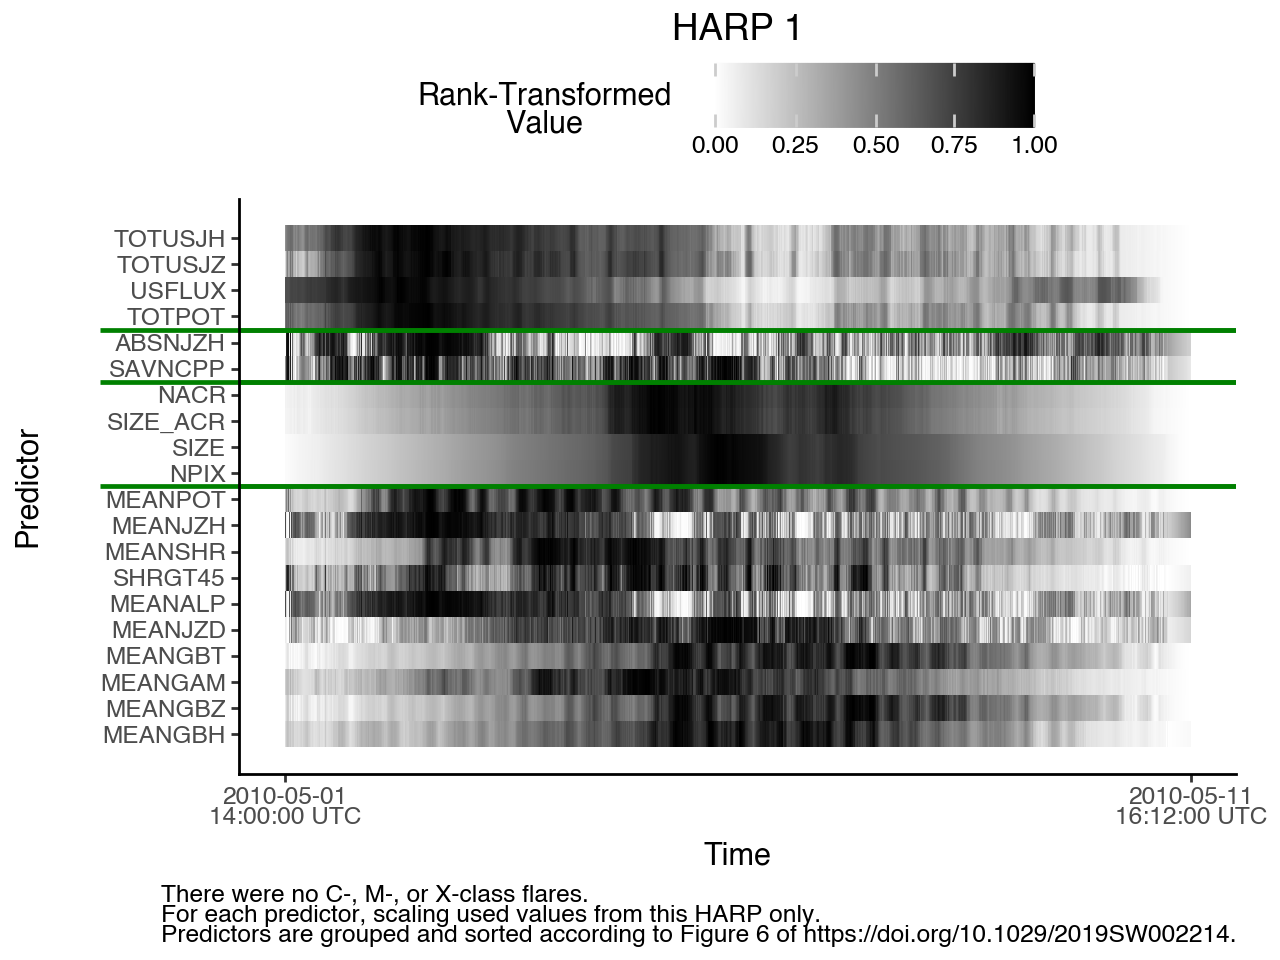

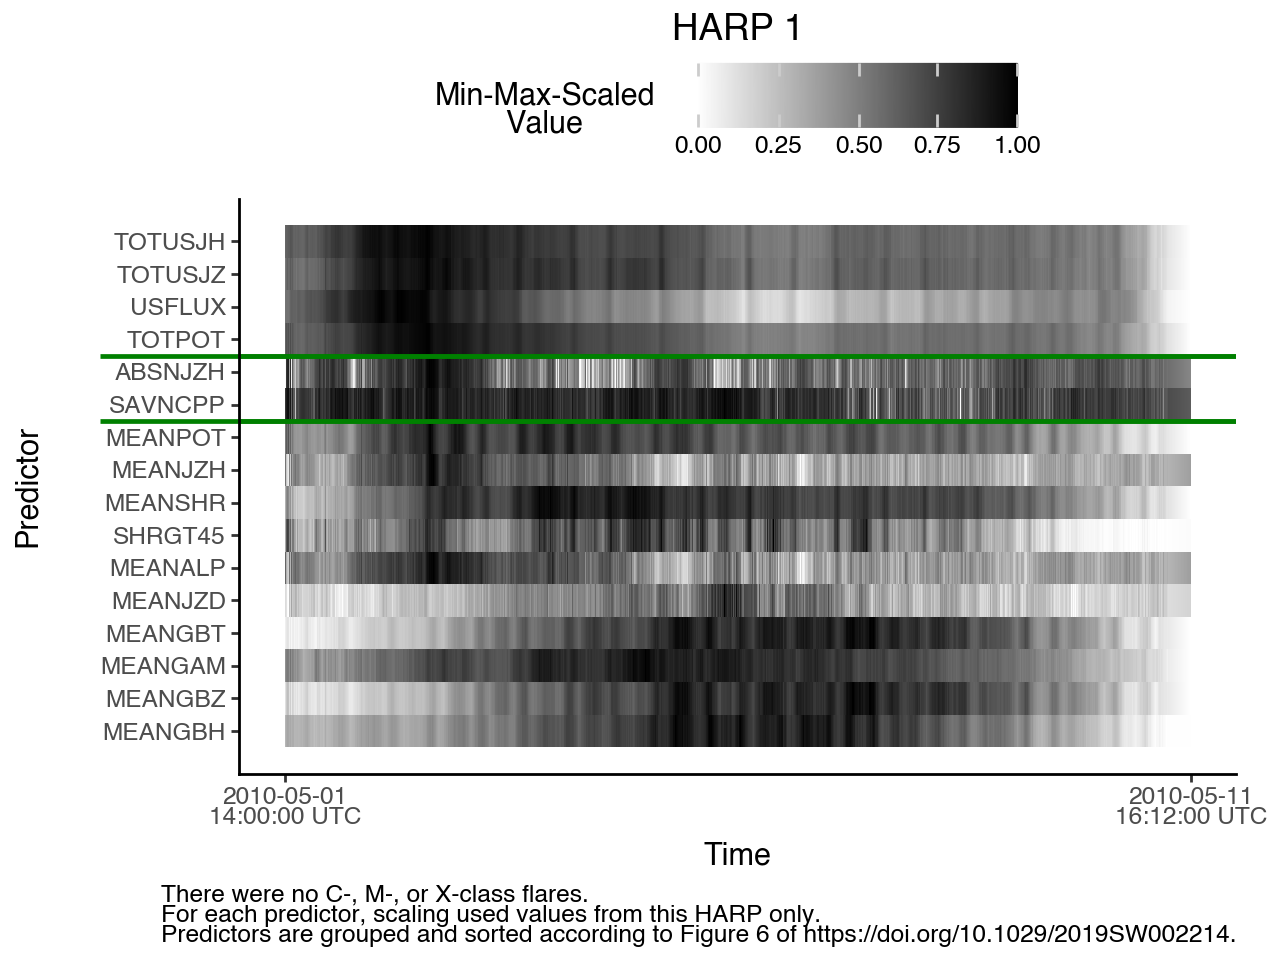

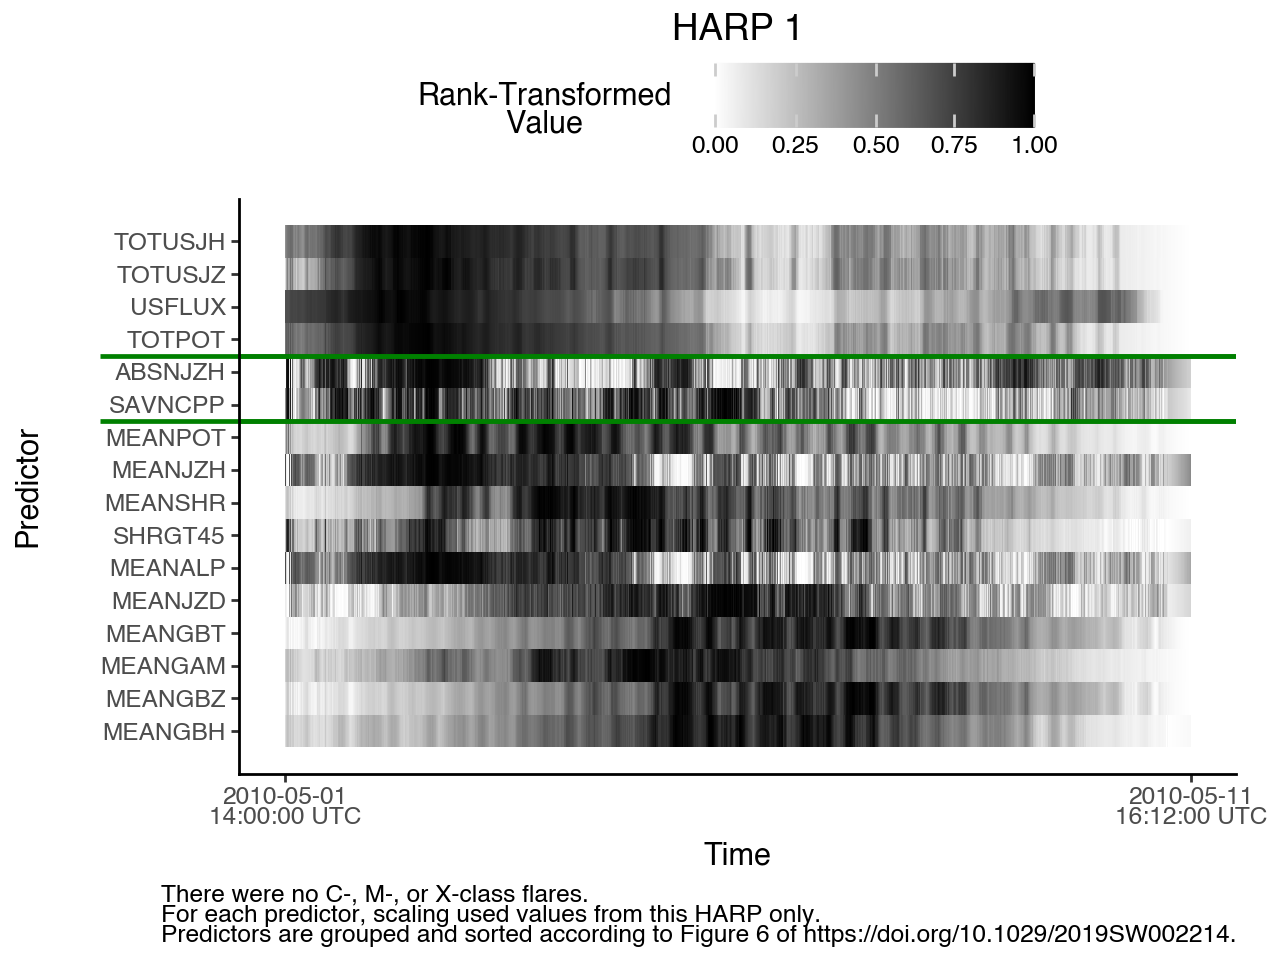

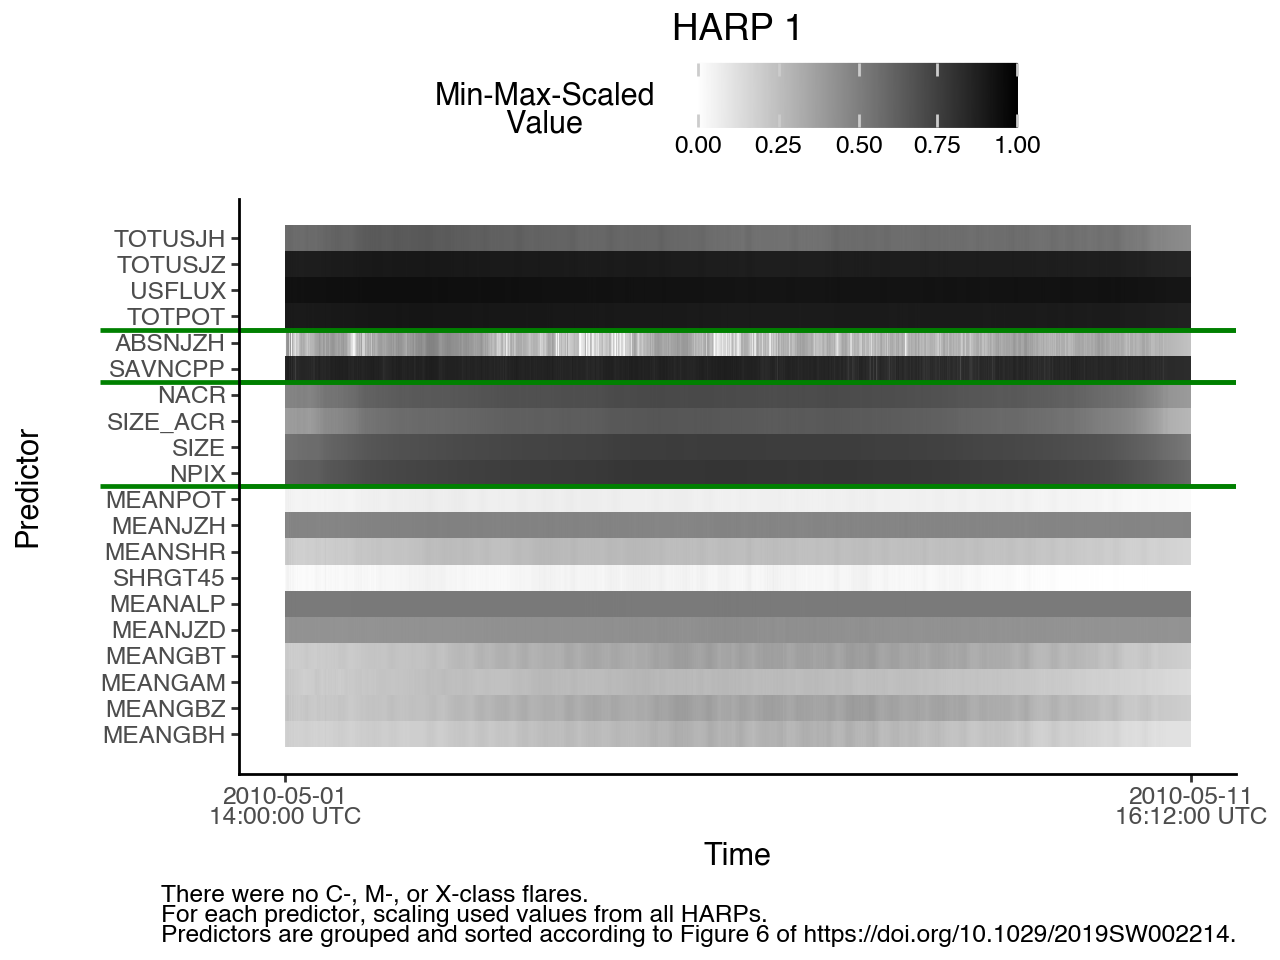

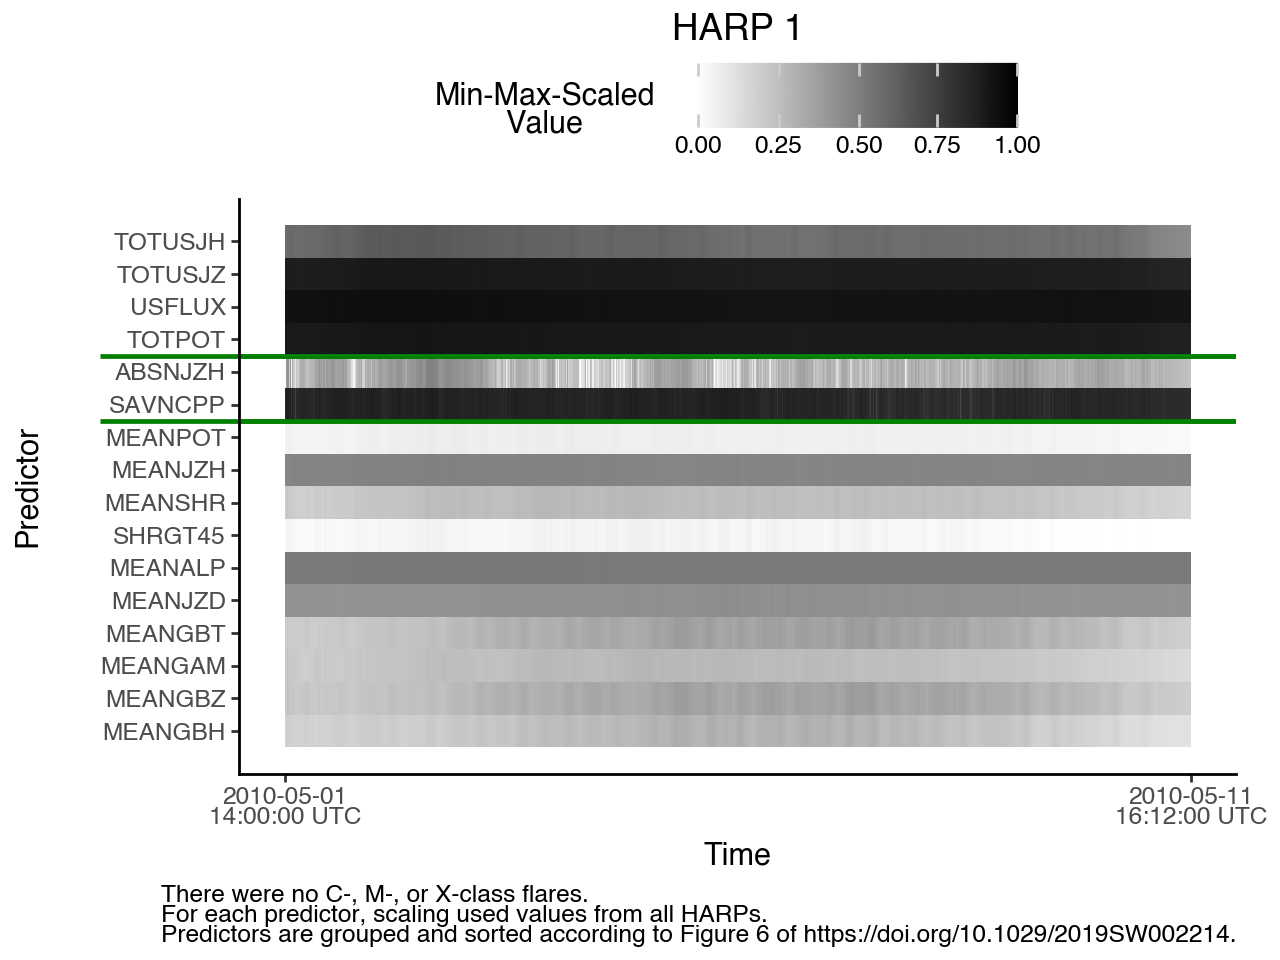

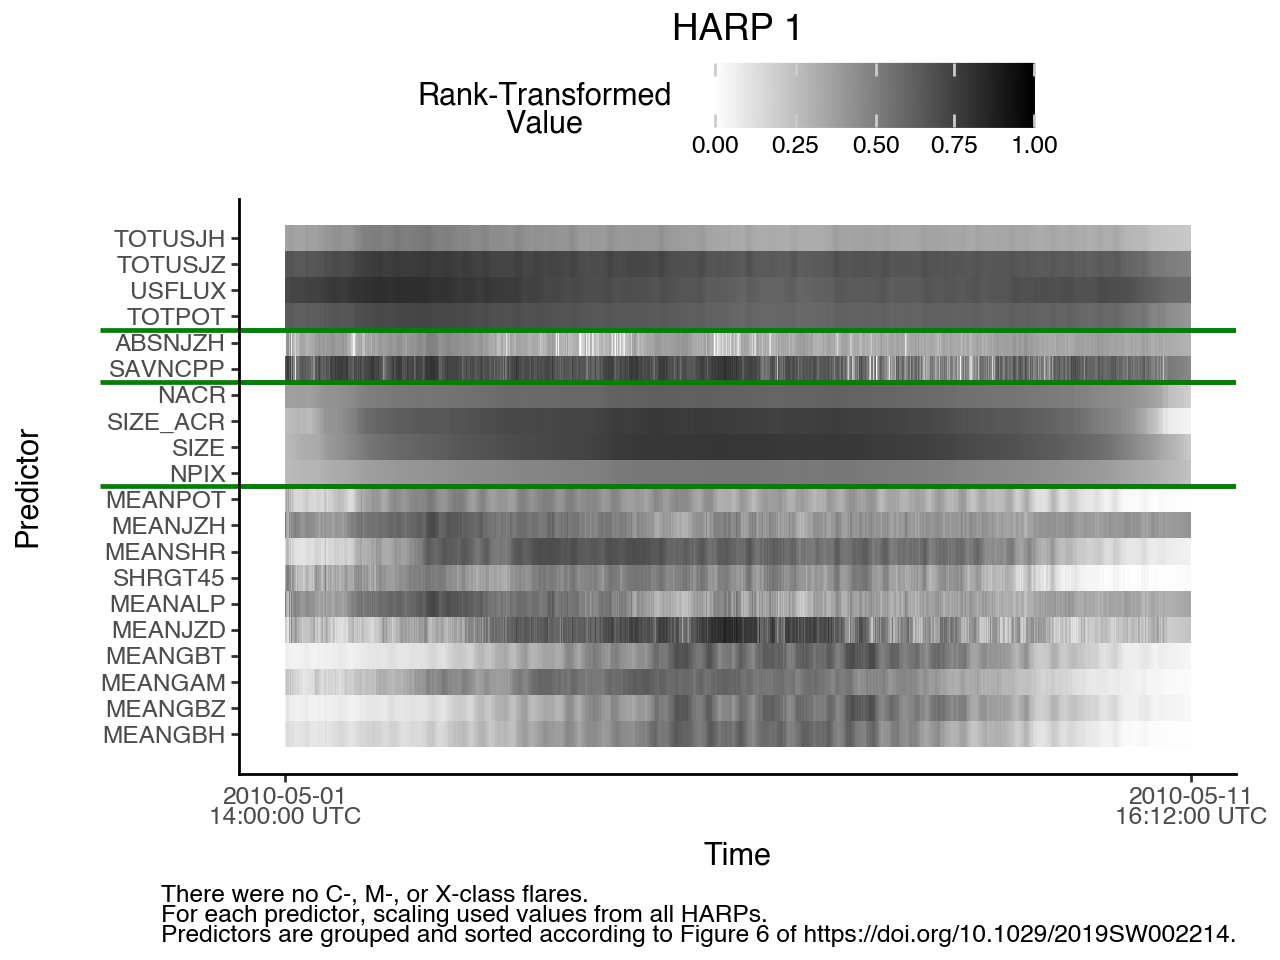

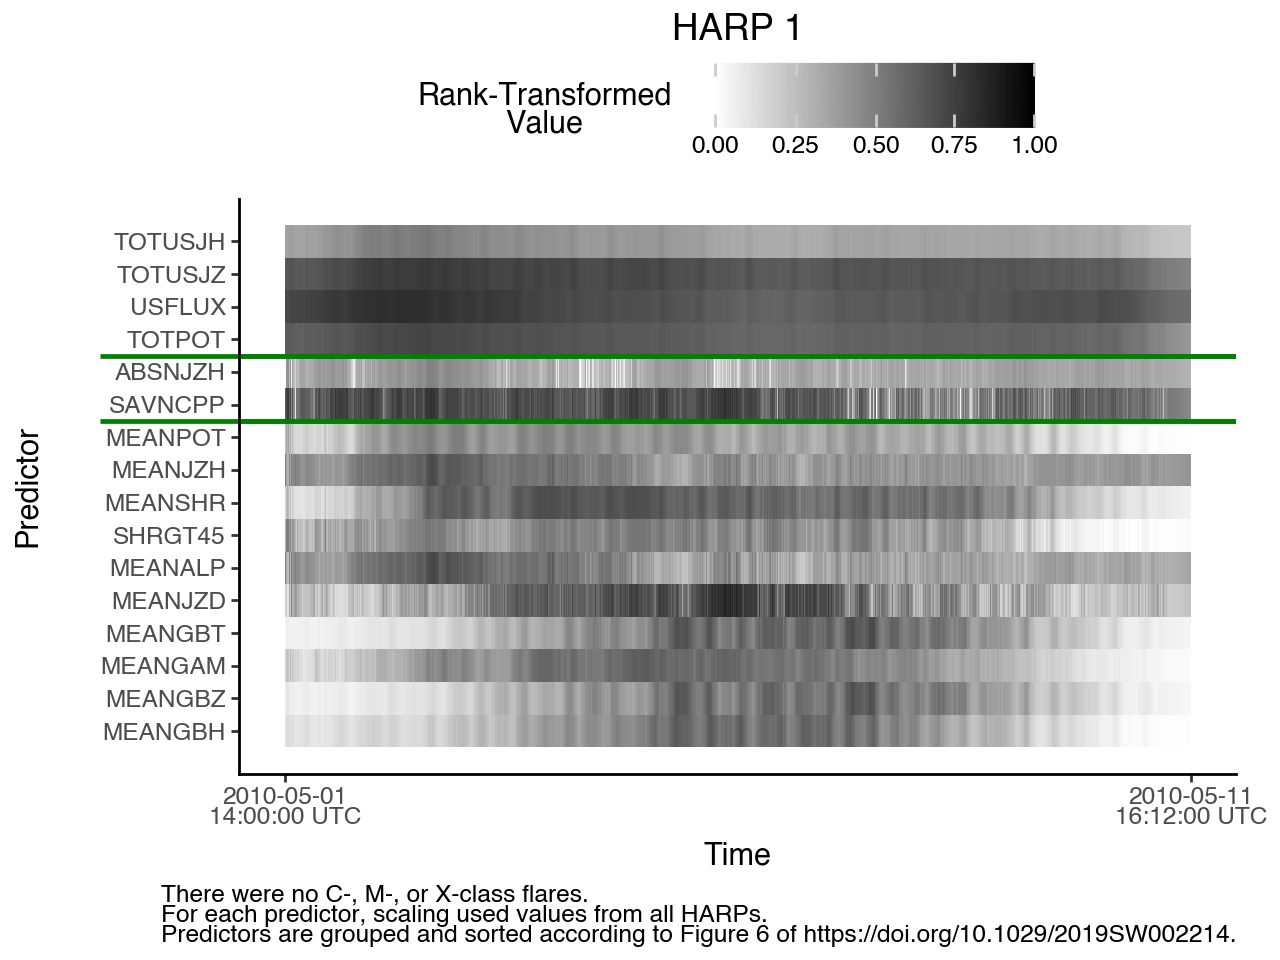

In [17]:
make_harp_flare_plot(harp_flare_data[harp_flare_data["HARPNUM"] == 1], transform_type="minmax", need_to_transform=True).show()
make_harp_flare_plot(harp_flare_data[harp_flare_data["HARPNUM"] == 1], transform_type="rank", need_to_transform=True).show()

make_harp_flare_plot(
    harp_flare_data[harp_flare_data["HARPNUM"] == 1],
    transform_type="minmax",
    need_to_transform=True,
    use_sharp_params_only=True
).show()
make_harp_flare_plot(
    harp_flare_data[harp_flare_data["HARPNUM"] == 1],
    transform_type="rank",
    need_to_transform=True,
    use_sharp_params_only=True
).show()

make_harp_flare_plot(minmax_scaled_harp_flare_data[minmax_scaled_harp_flare_data["HARPNUM"] == 1], transform_type="minmax").show()
make_harp_flare_plot(
    minmax_scaled_harp_flare_data[minmax_scaled_harp_flare_data["HARPNUM"] == 1],
    transform_type="minmax",
    use_sharp_params_only=True
).show()

make_harp_flare_plot(rank_transformed_harp_flare_data[rank_transformed_harp_flare_data["HARPNUM"] == 1], transform_type="rank").show()
make_harp_flare_plot(
    rank_transformed_harp_flare_data[rank_transformed_harp_flare_data["HARPNUM"] == 1],
    transform_type="rank",
    use_sharp_params_only=True
)

In [ ]:
minmax_scaled_harp_flare_data.loc[
    minmax_scaled_harp_flare_data["HARPNUM"] == 1, all_predictors
].agg(["min", "max"])

In [ ]:
harp_flare_stats_plots = harp_flare_stats

harp_flare_stats_plots["harp_by_harp_scaling_plot"] = (
    harp_flare_data
    .groupby("HARPNUM")[harp_flare_data.columns]
    .apply(make_harp_flare_plot, scale_data=True)
)
harp_flare_stats_plots["all_harps_scaling_plot"] = (
    minmax_scaled_harp_flare_data
    .groupby("HARPNUM")[minmax_scaled_harp_flare_data.columns]
    .apply(make_harp_flare_plot)
)

In [ ]:
save_as_pdf_pages(
    harp_flare_stats_plots.loc[harp_flare_stats_plots["num_x_flares"] > 0, "harp_by_harp_scaling_plot"],
    filename="harp_by_harp_scaling/x_plots.pdf"
)
save_as_pdf_pages(
    harp_flare_stats_plots.loc[harp_flare_stats_plots["num_x_flares"] > 0, "all_harps_scaling_plot"],
    filename="all_harps_scaling/x_plots.pdf"
)

In [ ]:
save_as_pdf_pages(
    harp_flare_stats_plots.loc[harp_flare_stats_plots["num_m_plus_flares"] > 0, "harp_by_harp_scaling_plot"],
    filename="harp_by_harp_scaling/m_plus_plots.pdf"
)
save_as_pdf_pages(
    harp_flare_stats_plots.loc[harp_flare_stats_plots["num_m_plus_flares"] > 0, "all_harps_scaling_plot"],
    filename="all_harps_scaling/m_plus_plots.pdf"
)

In [26]:
harp_flare_data.groupby("HARPNUM")["flare_class"].apply(calc_flare_class_flags).reset_index(level=1, drop=True)

,m_plus_flag,x_flag
HARPNUM,,
1,False,False
2,False,False
5,False,False
6,False,False
8,True,False
...,...,...
11564,False,False
11568,False,False
11569,False,False
